In [1]:
%pip install pandas
%pip install tabula-py
%pip install rdflib
%pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import os
import tabula
import pandas as pd
import rdflib
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
import re

directory = 'data/uk'

pdf_files = [f for f in os.listdir(directory) if f.endswith('.pdf')]

for pdf_file in pdf_files:
    pdf_file_name = re.sub('.pdf', '', pdf_file)
    file_path = os.path.join(directory, pdf_file)
    tabula.convert_into(file_path, f"{directory}/{pdf_file_name}.csv", output_format="csv", pages='all')
    print(f"Converted {pdf_file} to csv")


Converted ufo_report_2008.pdf to csv
Converted UFOReport1999.pdf to csv
Converted UFOReports2003WholeoftheUK.pdf to csv
Converted UFOReport2000.pdf to csv
Converted UFOReports2006WholeoftheUK.pdf to csv
Converted UFOReports2002WholeoftheUK.pdf to csv
Converted ufo_report_2007.pdf to csv
Converted ufo_report_2009.pdf to csv
Converted UFOReports2005WholeoftheUK.pdf to csv
Converted ufo_report_1997.pdf to csv
Converted UFOReport2001.pdf to csv
Converted UFOReports2004WholeoftheUK.pdf to csv
Converted UFOReport1998.pdf to csv


In [50]:
import os
import pandas as pd
import re

directory = 'data/uk'
all_csv_files = [f for f in os.listdir(directory) if re.search(r'\.csv$', f)]

# Initialize an empty DataFrame to store combined data
combined_csv_data = pd.DataFrame()

# Define the new column names
new_column_names = ['date', 'time', 'city', 'area', 'occupation of reporter', 'description']

# Define a function to map old column names to new column names based on patterns
def rename_columns(columns):
    column_mapping = {
        re.compile(r'date', re.IGNORECASE): 'date',
        re.compile(r'time', re.IGNORECASE): 'time',
        re.compile(r'(town|village|city)', re.IGNORECASE): 'city',
        re.compile(r'county|area', re.IGNORECASE): 'area',
        re.compile(r'occupation', re.IGNORECASE): 'occupation of reporter',
        re.compile(r'description', re.IGNORECASE): 'description'
    }
    new_columns = []
    for col in columns:
        for pattern, new_name in column_mapping.items():
            if pattern.search(col):
                new_columns.append(new_name)
                break
        else:
            new_columns.append(col)  # Keep the original column name if no pattern matches

    # Ensure the columns are unique
    unique_columns = []
    seen = set()
    for col in new_columns:
        if col in seen:
            counter = 1
            new_col = f"{col}_{counter}"
            while new_col in seen:
                counter += 1
                new_col = f"{col}_{counter}"
            unique_columns.append(new_col)
            seen.add(new_col)
        else:
            unique_columns.append(col)
            seen.add(col)

    return unique_columns

# Iterate over each CSV file and concatenate them into one DataFrame
for csv_file in all_csv_files:
    file_path = os.path.join(directory, csv_file)
    try:
        temp_df = pd.read_csv(file_path, on_bad_lines='skip')
        temp_df.columns = rename_columns(temp_df.columns)  # Rename the columns
        # Drop unnamed columns
        temp_df = temp_df.loc[:, ~temp_df.columns.str.contains('^Unnamed')]
        combined_csv_data = pd.concat([combined_csv_data, temp_df], ignore_index=True)
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {file_path}: {e}")

# Add the 'country' column with the value 'UK' for all rows
combined_csv_data['country'] = 'UK'
combined_csv_data = combined_csv_data[['date', 'time', 'city', 'area', 'country', 'description']]
combined_csv_data ['date'] = combined_csv_data ['date'].apply() 

# Save the combined data into a single CSV file
combined_csv_data.to_csv(os.path.join('data', 'uk_ufo_sightings.csv'), index=False)
print("All CSV files have been combined into one CSV file.")


All CSV files have been combined into one CSV file.


In [54]:
uk = pd.read_csv('data/uk_ufo_sightings.csv')
uk.head(50)

,date,time,city,area,country,description
0,01-Jan-00,07:30,Tenbury Wells,Shropshire,UK,"A cigar shaped object. Grey in colour, with tw..."
1,03-Jan-00,20:45,Evanton,Ross-Shire,UK,"A gold disc was seen. It flew through cloud, r..."
2,04-Jan-00,00:30,Erdingham/Birmingham,West Midlands,UK,"One large, triangular shaped object. There wer..."
3,05-Jan-00,01:20,Wootton Bassett,Wiltshire,UK,One single object. Changed from white to green...
4,09-Jan-00,02:45,Runcorn,Cheshire,UK,"One round, golf ball shaped object. Orange and..."
5,09-Jan-00,21:36,Barnstable,Devon,UK,One cylindrical object. Blue and green in colo...
6,09-Jan-00,18:06,NaN,Cheshire,UK,The object eclipsed the moon. The object was a...
7,13-Jan-00,23:45,Motherwell,Lanarkshire,UK,"One, pulsating orange ball. Object was travell..."
8,14-Jan-00,NaN,NaN,London,UK,"A floating object, sitting in front of a cloud..."
9,17-Jan-00,21:20,Leeds,West Yorkshire,UK,Disc that was illuminated. About 200 ft up and...


In [51]:

us = pd.read_csv('data/us_ufo_sightings.csv')
us.head(10)

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167


In [53]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])
uk.head(50)

ParserError: Error tokenizing data. C error: Expected 7 fields in line 45, saw 8


In [66]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])

graph = rdflib.Graph()

# Add uk to graph with columns Date / Time /Area/ Description
for index, row in uk.head(10).iterrows():
    subject = rdflib.URIRef(f"https://example.com/uk/ufo_sighting/{index}")
    graph.add((subject, rdflib.RDF.type, rdflib.URIRef("https://example.com/uk/ufo_sighting")))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/date"), rdflib.Literal(row['Date'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/time"), rdflib.Literal(row['Time'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/area"), rdflib.Literal(row['Area'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/description"), rdflib.Literal(row['Description'])))
print(graph.serialize(format='turtle'))
# uk.head()



@prefix ns1: <https://example.com/uk/> .

<https://example.com/uk/ufo_sighting/0> a ns1:ufo_sighting ;
    ns1:area "Warwickshire" ;
    ns1:date "Jan-09" ;
    ns1:description "An orange glowing object with a red light on the right-hand side." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/1> a ns1:ufo_sighting ;
    ns1:area "North Yorkshire" ;
    ns1:date "Jan-09" ;
    ns1:description "Very curious. A very bright light, four times that of a star." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/2> a ns1:ufo_sighting ;
    ns1:area "Oxfordshire" ;
    ns1:date "Jan-09" ;
    ns1:description "A very bright constant red light." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/3> a ns1:ufo_sighting ;
    ns1:area "Buckinghamshire" ;
    ns1:date "Jan-09" ;
    ns1:description "been outside the individuals house for some nights and then one\rnight." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/4> a ns1:ufo_s

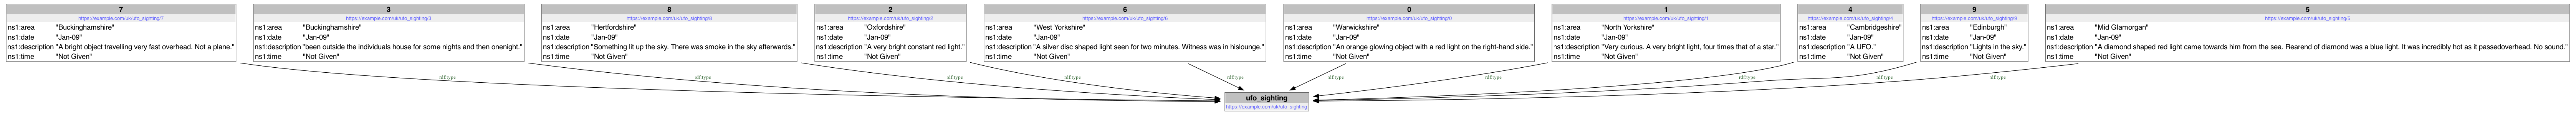

In [67]:
stream = io.StringIO()
rdf2dot(graph, stream, opts = {display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))

In [4]:
from rdflib import Graph, Namespace, Literal, RDF, RDFS, XSD
import pandas as pd
from datetime import datetime

# Create an RDF graph
g = Graph()

# Define Namespace
ufo = Namespace("https://example.org/ufo/")


us = us[:5]

# Define RDF schema and add to the graph
g.bind("ufo", ufo)

# Define RDF Turtle data
rdfttl = """
@prefix ufo: <https://example.org/ufo/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Define classes
ufo:Sighting rdf:type rdfs:Class .
ufo:Location rdf:type rdfs:Class .
ufo:Country rdf:type rdfs:Class .
ufo:State rdf:type rdfs:Class .
ufo:City rdf:type rdfs:Class .
ufo:UFOShape rdf:type rdfs:Class .
ufo:Time rdf:type rdfs:Class .
ufo:Date rdf:type rdfs:Class .
ufo:Person rdf:type rdfs:Class .
ufo:Witness rdf:type rdfs:Class .

# Define subclass relationships
ufo:UFO rdfs:subClassOf ufo:Sighting .
ufo:Location rdfs:subClassOf ufo:Sighting .
ufo:Country rdfs:subClassOf ufo:Location .
ufo:State rdfs:subClassOf ufo:Location .
ufo:City rdfs:subClassOf ufo:Location .
ufo:UFOShape rdfs:subClassOf rdf:Property .
ufo:Time rdfs:subClassOf rdf:Property .
ufo:Date rdfs:subClassOf ufo:Time .
ufo:Person rdfs:subClassOf rdf:Property .
ufo:Witness rdfs:subClassOf ufo:Person .

# Define properties and their domains/ranges
ufo:date rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:time rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:time .

ufo:location rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:Location .

ufo:ufo_shape rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:UFOShape .

ufo:encounter_length rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:float .

ufo:description rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:date_documented rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:latitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:longitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .
"""

# Parse RDF Turtle data
g.parse(data=rdfttl, format="turtle")

# Iterate over rows in the DataFrame and add individual instances to the graph
for idx, row in us.iterrows():
    # Create unique URIs for each sighting and location
    sighting_uri = ufo[f"Sighting{idx+1}"]
    location_uri = ufo[f"Location{idx+1}"]  # Adjust as needed for URI creation
    
    # Convert date and time strings to RDF-compatible formats
    try:
        parsed_date = datetime.strptime(row['date_documented'], '%m/%d/%Y').date().isoformat()
    except ValueError:
        parsed_date = None
    
    if parsed_date:
        g.add((sighting_uri, RDF.type, ufo.Sighting))
        g.add((sighting_uri, ufo.date_documented, Literal(parsed_date, datatype=XSD.date)))
        g.add((sighting_uri, ufo.location, location_uri))  # Connect sighting to its location
        g.add((location_uri, RDF.type, ufo.Location))
        g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
        if row['state']:
            g.add((location_uri, ufo.state, Literal(row['state'], datatype=XSD.string)))
        g.add((location_uri, ufo.latitude, Literal(row['latitude'], datatype=XSD.float)))
        g.add((location_uri, ufo.longitude, Literal(row['longitude'], datatype=XSD.float)))

# Serialize the graph to TTL and print or save it if needed
print(g.serialize(format="turtle"))



@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ufo: <https://example.org/ufo/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ufo:City a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Country a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Date a rdfs:Class ;
    rdfs:subClassOf ufo:Time .

ufo:Location a rdfs:Class ;
    rdfs:subClassOf ufo:Sighting .

ufo:Person a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:Sighting a rdfs:Class .

ufo:State a rdfs:Class ;
    rdfs:subClassOf ufo:Location .

ufo:Time a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:UFOShape a rdfs:Class ;
    rdfs:subClassOf rdf:Property .

ufo:Witness a rdfs:Class ;
    rdfs:subClassOf ufo:Person .

ufo:Sighting1 a ufo:Sighting ;
    ufo:date_documented "2004-04-27"^^xsd:date ;
    ufo:location ufo:Location1 .

ufo:Sighting2 a ufo:Sighting ;
    ufo:date_documented "2005-12-16"^^xsd:date ;
    ufo:locatio

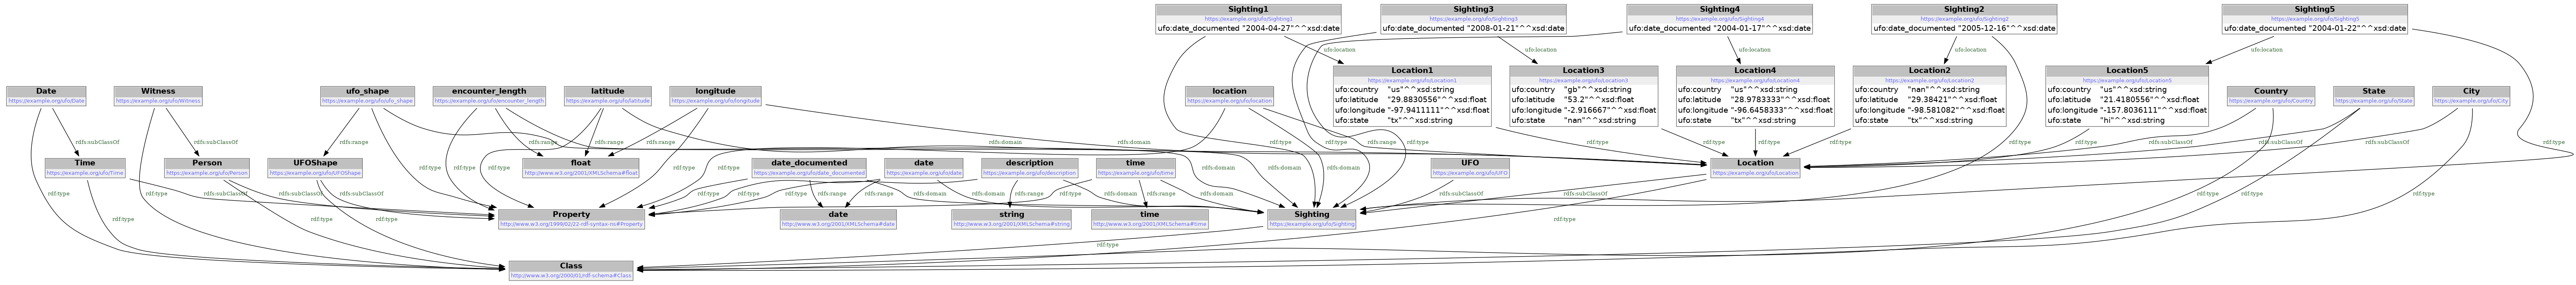

In [5]:
# Generate the graph visualization
from rdflib.tools.rdf2dot import rdf2dot
import io
import pydotplus
from IPython.display import display, Image

stream = io.StringIO()
rdf2dot(g, stream, opts={})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()

# Display the graph
display(Image(png))


In [3]:
import pandas as pd
from rdflib import Graph, Namespace, Literal, RDF, RDFS, XSD

# Load datasets
us = pd.read_csv('data/us_ufo_sightings.csv')
dataset1 = pd.read_csv('data/us_ufo_sightings.csv')
dataset2 = pd.read_csv('data/uk_ufo_sightings.csv')
dataset1 = dataset1[:5]
dataset2 = dataset2[:5]

# Define Namespace
ufo = Namespace("https://example.org/ufo/")

# Create RDF graph
g = Graph()
g.bind("ufo", ufo)

# Define RDF schema and add to the graph
rdfttl = """
@prefix ufo: <https://example.org/ufo/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Define classes
ufo:Sighting rdf:type rdfs:Class .
ufo:Location rdf:type rdfs:Class .
ufo:Country rdf:type rdfs:Class .
ufo:State rdf:type rdfs:Class .
ufo:City rdf:type rdfs:Class .
ufo:UFOShape rdf:type rdfs:Class .

# Define properties and their domains/ranges
ufo:date rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:time rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:time .

ufo:description rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:location rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:Location .

ufo:ufo_shape rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range ufo:UFOShape .

ufo:encounter_length rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:float .

ufo:date_documented rdf:type rdf:Property ;
    rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:latitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:longitude rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:city rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:string .

ufo:state rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:string .

ufo:country rdf:type rdf:Property ;
    rdfs:domain ufo:Location ;
    rdfs:range xsd:string .
"""

# Parse RDF Turtle data
g.parse(data=rdfttl, format="turtle")

# Function to convert date format from dataset1
def convert_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M').strftime('%Y-%m-%d %H:%M:%S')
    except ValueError:
        return None

# Iterate over dataset1 and add triples to the graph
for idx, row in dataset1.iterrows():
    sighting_uri = ufo[f"Sighting_{idx+1}"]
    location_uri = ufo[f"Location_{idx+1}"]
    
    parsed_date_time = convert_date_format(row['date_time'])
    
    if parsed_date_time:
        date, time = parsed_date_time.split(' ')
        # Add triples for dataset1
        g.add((sighting_uri, RDF.type, ufo.Sighting))
        g.add((sighting_uri, ufo.date, Literal(date, datatype=XSD.date)))
        g.add((sighting_uri, ufo.time, Literal(time, datatype=XSD.time)))
        g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
        g.add((sighting_uri, ufo.encounter_length, Literal(row['encounter_length'], datatype=XSD.float)))
        g.add((sighting_uri, ufo.date_documented, Literal(pd.to_datetime(row['date_documented']).strftime('%Y-%m-%d'), datatype=XSD.date)))
        
        # Location triples
        g.add((location_uri, RDF.type, ufo.Location))
        g.add((location_uri, ufo.city, Literal(row['city_area'], datatype=XSD.string)))
        g.add((location_uri, ufo.state, Literal(row['state'], datatype=XSD.string)))
        g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
        g.add((location_uri, ufo.latitude, Literal(row.get('latitude', 0.0), datatype=XSD.float)))
        g.add((location_uri, ufo.longitude, Literal(row.get('longitude', 0.0), datatype=XSD.float)))
        g.add((sighting_uri, ufo.location, location_uri))

# Iterate over dataset2 and add triples to the graph
for idx, row in dataset2.iterrows():
    sighting_uri = ufo[f"Sighting_{idx+1+len(dataset1)}"]
    location_uri = ufo[f"Location_{idx+1+len(dataset1)}"]
    
    parsed_date = pd.to_datetime(row['date'], format='%d-%b-%y').strftime('%Y-%m-%d')
    
    # Add triples for dataset2
    g.add((sighting_uri, RDF.type, ufo.Sighting))
    g.add((sighting_uri, ufo.date, Literal(parsed_date, datatype=XSD.date)))
    g.add((sighting_uri, ufo.time, Literal(row['time'], datatype=XSD.time)))
    g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
    
    # Location triples
    g.add((location_uri, RDF.type, ufo.Location))
    g.add((location_uri, ufo.city, Literal(row['city'], datatype=XSD.string)))
    g.add((location_uri, ufo.state, Literal(row['area'], datatype=XSD.string)))
    g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
    g.add((sighting_uri, ufo.location, location_uri))

# Serialize the graph to Turtle format and save it to a file
with open("ufo_knowledge_graph.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

# Print the serialized graph
print(g.serialize(format="turtle"))


@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ufo: <https://example.org/ufo/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ufo:City a rdfs:Class .

ufo:Country a rdfs:Class .

ufo:Location a rdfs:Class .

ufo:Sighting a rdfs:Class .

ufo:State a rdfs:Class .

ufo:UFOShape a rdfs:Class .

ufo:Sighting_1 a ufo:Sighting ;
    ufo:date "1949-10-10"^^xsd:date ;
    ufo:date_documented "2004-04-27"^^xsd:date ;
    ufo:description "This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit"^^xsd:string ;
    ufo:encounter_length "2700.0"^^xsd:float ;
    ufo:location ufo:Location_1 ;
    ufo:time "20:30:00"^^xsd:time .

ufo:Sighting_10 a ufo:Sighting ;
    ufo:date "2000-01-09"^^xsd:date ;
    ufo:description "One round, golf ball shaped object. Orange and white in colour and very bright. Moving East."^^xsd:string ;
    ufo:locati

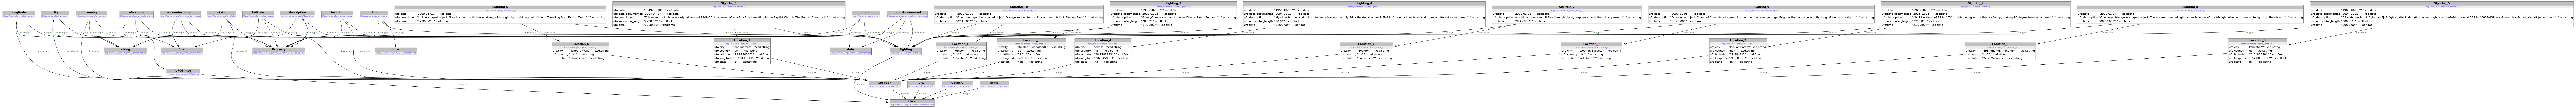

In [4]:
# Generate the graph visualization
from rdflib.tools.rdf2dot import rdf2dot
import io
import pydotplus
from IPython.display import display, Image

stream = io.StringIO()
rdf2dot(g, stream, opts={})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()

# Display the graph
display(Image(png))


In [8]:
import pandas as pd
from rdflib import Graph, Namespace, Literal, RDF, RDFS, XSD

# Load datasets
us_data = pd.read_csv('data/us_ufo_sightings.csv').head()
uk_data = pd.read_csv('SemaWeb/data/uk_ufo_sightings.csv').head()

# Define Namespace
ufo = Namespace("https://example.org/ufo/")

# Create RDF graph
g = Graph()
g.bind("ufo", ufo)

# Define RDF schema and add to the graph
rdfttl = """
@prefix ufo: <https://example.org/ufo/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Define main classes
ufo:Sighting rdfs:subClassOf ufo:Event .
ufo:Location rdfs:subClassOf ufo:Place .

# Define subclasses
ufo:Country rdfs:subClassOf ufo:Location .
ufo:State rdfs:subClassOf ufo:Location .
ufo:City rdfs:subClassOf ufo:Location .
ufo:UFOShape rdfs:subClassOf ufo:Object .

# Define properties
ufo:date rdfs:domain ufo:Sighting ;
    rdfs:range xsd:dateTime .

ufo:time rdfs:domain ufo:Sighting ;
    rdfs:range xsd:time .

ufo:description rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:location rdfs:domain ufo:Sighting ;
    rdfs:range ufo:Location .

ufo:ufo_shape rdfs:domain ufo:Sighting ;
    rdfs:range ufo:UFOShape .

ufo:encounter_length rdfs:domain ufo:Sighting ;
    rdfs:range xsd:float .

ufo:described_encounter_length rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:date_documented rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:latitude rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:longitude rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

# Define subproperties for location details
ufo:city rdfs:domain ufo:City ;
    rdfs:range xsd:string .

ufo:state rdfs:domain ufo:State ;
    rdfs:range xsd:string .

ufo:country rdfs:domain ufo:Country ;
    rdfs:range xsd:string .
"""

# Parse RDF Turtle data
g.parse(data=rdfttl, format="turtle")

# Function to convert date formats
def convert_us_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M').strftime('%Y-%m-%dT%H:%M:%S')
    except ValueError:
        return None

# Add US data to RDF graph
for idx, row in us_data.iterrows():
    sighting_uri = ufo[f"Sighting_US_{idx+1}"]
    location_uri = ufo[f"Location_US_{idx+1}"]

    date_time_split = row['date_time'].split(' ')
    date = convert_us_date(row['date_time'])

    if date:
        g.add((sighting_uri, RDF.type, ufo.Sighting))
        g.add((sighting_uri, ufo.date, Literal(date, datatype=XSD.dateTime)))
        g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
        g.add((sighting_uri, ufo.encounter_length, Literal(row['encounter_length'], datatype=XSD.float)))
        g.add((sighting_uri, ufo.described_encounter_length, Literal(row['described_encounter_length'], datatype=XSD.string)))
        g.add((sighting_uri, ufo.date_documented, Literal(convert_us_date(row['date_documented']), datatype=XSD.date)))
        g.add((sighting_uri, ufo.ufo_shape, Literal(row['ufo_shape'], datatype=XSD.string)))

        # Add location details
        g.add((location_uri, RDF.type, ufo.Location))
        g.add((location_uri, ufo.city, Literal(row['city_area'], datatype=XSD.string)))
        g.add((location_uri, ufo.state, Literal(row['state'], datatype=XSD.string)))
        g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
        g.add((location_uri, ufo.latitude, Literal(float(row.get('latitude', 0.0)), datatype=XSD.float)))
        g.add((location_uri, ufo.longitude, Literal(float(row.get('longitude', 0.0)), datatype=XSD.float)))
        g.add((sighting_uri, ufo.location, location_uri))
    
# Add UK data to RDF graph
for idx, row in uk_data.iterrows():
    sighting_uri = ufo[f"Sighting_UK_{idx+1}"]  # Unique URI for US sightings
    location_uri = ufo[f"Location_UK_{idx+1}"]  # Unique URI for US locations
    
    parsed_date = pd.to_datetime(row['date'], format='%d-%b-%y').strftime('%Y-%m-%d')
    
    # Add triples for dataset2
    g.add((sighting_uri, RDF.type, ufo.Sighting))
    g.add((sighting_uri, ufo.date, Literal(parsed_date, datatype=XSD.date)))
    g.add((sighting_uri, ufo.time, Literal(row['time'], datatype=XSD.time)))
    g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
    
    # Location triples
    g.add((location_uri, RDF.type, ufo.Location))
    g.add((location_uri, ufo.city, Literal(row['city'], datatype=XSD.string)))
    g.add((location_uri, ufo.state, Literal(row['area'], datatype=XSD.string)))
    g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
    g.add((sighting_uri, ufo.location, location_uri))

# Serialize the graph to Turtle format and save it to a file
with open("ufo_knowledge_graph.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

# Print the serialized graph
print(g.serialize(format="turtle"))

FileNotFoundError: [Errno 2] No such file or directory: 'SemaWeb/data/uk_ufo_sightings.csv'

In [34]:
import pandas as pd
from rdflib import Graph, Namespace, Literal, RDF, RDFS, XSD

# Load datasets
us_data = pd.read_csv('data/us_ufo_sightings.csv').head(10)
uk_data = pd.read_csv('data/uk_ufo_sightings.csv').head(10)

# Define Namespace
ufo = Namespace("https://example.org/ufo/")

# Create RDF graph
g = Graph()
g.bind("ufo", ufo)

# Define RDF schema and add to the graph
rdfttl = """
@prefix ufo: <https://example.org/ufo/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Define main classes
ufo:Sighting rdfs:subClassOf ufo:Event .
ufo:Location rdfs:subClassOf ufo:Place .

# Define subclasses
ufo:Country rdfs:subClassOf ufo:Location .
ufo:State rdfs:subClassOf ufo:Location .
ufo:City rdfs:subClassOf ufo:Location .
ufo:UFOShape rdfs:subClassOf ufo:Object .

# Define properties
ufo:date rdfs:domain ufo:Sighting ;
    rdfs:range xsd:dateTime .

ufo:time rdfs:domain ufo:Sighting ;
    rdfs:range xsd:time .

ufo:description rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:location rdfs:domain ufo:Sighting ;
    rdfs:range ufo:Location .

ufo:ufo_shape rdfs:domain ufo:Sighting ;
    rdfs:range ufo:UFOShape .

ufo:encounter_length rdfs:domain ufo:Sighting ;
    rdfs:range xsd:float .

ufo:described_encounter_length rdfs:domain ufo:Sighting ;
    rdfs:range xsd:string .

ufo:date_documented rdfs:domain ufo:Sighting ;
    rdfs:range xsd:date .

ufo:latitude rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

ufo:longitude rdfs:domain ufo:Location ;
    rdfs:range xsd:float .

# Define subproperties for location details
ufo:city rdfs:domain ufo:City ;
    rdfs:range xsd:string .

ufo:state rdfs:domain ufo:State ;
    rdfs:range xsd:string .

ufo:country rdfs:domain ufo:Country ;
    rdfs:range xsd:string .
"""

# Parse RDF Turtle data
g.parse(data=rdfttl, format="turtle")

# Function to convert date formats
def convert_us_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M').strftime('%Y-%m-%dT%H:%M:%S')
    except ValueError:
        return None

# Add US data to RDF graph
for idx, row in us_data.iterrows():
    sighting_uri = ufo[f"Sighting_US_{idx+1}"]
    location_uri = ufo[f"Location_US_{idx+1}"]

    date_time_split = row['date_time'].split(' ')
    date = convert_us_date(row['date_time'])

    if date:
        g.add((sighting_uri, RDF.type, ufo.Sighting))
        g.add((sighting_uri, ufo.date, Literal(date, datatype=XSD.dateTime)))
        g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
        g.add((sighting_uri, ufo.encounter_length, Literal(row['encounter_length'], datatype=XSD.float)))
        g.add((sighting_uri, ufo.described_encounter_length, Literal(row['described_encounter_length'], datatype=XSD.string)))
        g.add((sighting_uri, ufo.date_documented, Literal(convert_us_date(row['date_documented']), datatype=XSD.date)))
        g.add((sighting_uri, ufo.ufo_shape, Literal(row['ufo_shape'], datatype=XSD.string)))

        # Add location details
        g.add((location_uri, RDF.type, ufo.Location))
        g.add((location_uri, ufo.city, Literal(row['city_area'], datatype=XSD.string)))
        g.add((location_uri, ufo.state, Literal(row['state'], datatype=XSD.string)))
        g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
        g.add((location_uri, ufo.latitude, Literal(float(row.get('latitude', 0.0)), datatype=XSD.float)))
        g.add((location_uri, ufo.longitude, Literal(float(row.get('longitude', 0.0)), datatype=XSD.float)))
        g.add((sighting_uri, ufo.location, location_uri))
    
# Add UK data to RDF graph
for idx, row in uk_data.iterrows():
    sighting_uri = ufo[f"Sighting_UK_{idx+1}"]  # Unique URI for US sightings
    location_uri = ufo[f"Location_UK_{idx+1}"]  # Unique URI for US locations
    
    parsed_date = pd.to_datetime(row['date'], format='%d-%b-%y').strftime('%Y-%m-%d')
    
    # Add triples for dataset2
    g.add((sighting_uri, RDF.type, ufo.Sighting))
    g.add((sighting_uri, ufo.date, Literal(parsed_date, datatype=XSD.date)))
    g.add((sighting_uri, ufo.time, Literal(row['time'], datatype=XSD.time)))
    g.add((sighting_uri, ufo.description, Literal(row['description'], datatype=XSD.string)))
    
    # Location triples
    g.add((location_uri, RDF.type, ufo.Location))
    g.add((location_uri, ufo.city, Literal(row['city'], datatype=XSD.string)))
    g.add((location_uri, ufo.state, Literal(row['area'], datatype=XSD.string)))
    g.add((location_uri, ufo.country, Literal(row['country'], datatype=XSD.string)))
    g.add((sighting_uri, ufo.location, location_uri))

# Serialize the graph to Turtle format and save it to a file
with open("ufo_knowledge_graph.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

# Print the serialized graph
print(g.serialize(format="turtle"))

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ufo: <https://example.org/ufo/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ufo:Sighting_UK_1 a ufo:Sighting ;
    ufo:date "2000-01-01"^^xsd:date ;
    ufo:description "A cigar shaped object. Grey in colour, with two windows, with bright lights shining out of them. Travelling from East to West."^^xsd:string ;
    ufo:location ufo:Location_UK_1 ;
    ufo:time "07:30:00"^^xsd:time .

ufo:Sighting_UK_10 a ufo:Sighting ;
    ufo:date "2000-01-17"^^xsd:date ;
    ufo:description "Disc that was illuminated. About 200 ft up and 150 ft long."^^xsd:string ;
    ufo:location ufo:Location_UK_10 ;
    ufo:time "21:20:00"^^xsd:time .

ufo:Sighting_UK_2 a ufo:Sighting ;
    ufo:date "2000-01-03"^^xsd:date ;
    ufo:description "A gold disc was seen. It flew through cloud, reappeared and then disappeared."^^xsd:string ;
    ufo:location ufo:Location_UK_2 ;
    ufo:time "20:45:00"^^xsd:time .

ufo:Sighting_UK_3 a ufo:Sighting ;

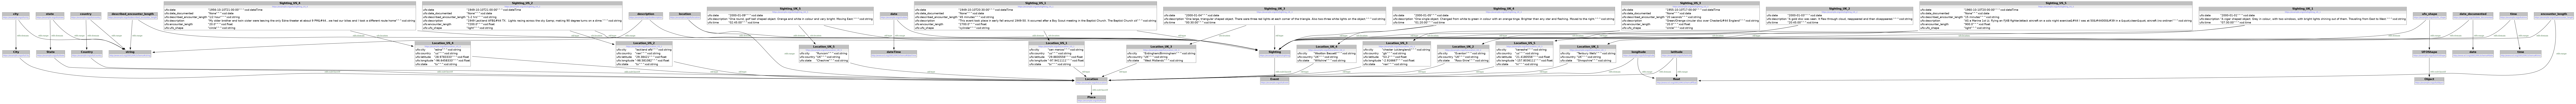

In [12]:
# Generate the graph visualization
from rdflib.tools.rdf2dot import rdf2dot
import io
import pydotplus
from IPython.display import display, Image

stream = io.StringIO()
rdf2dot(g, stream, opts={})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()

# Display the graph
display(Image(png))

In [35]:
from rdflib.plugins.sparql import prepareQuery

# SPARQL query to retrieve all UFO sightings with their descriptions and dates
query1 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?sighting ?description ?date
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:description ?description ;
                ufo:date ?date .
    }
""")

# Execute the query and print the results
for row in g.query(query1):
    print(f"Sighting: {row.sighting}, Description: {row.description}, Date: {row.date}")


Sighting: https://example.org/ufo/Sighting_US_1, Description: This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit, Date: 1949-10-10T20:30:00
Sighting: https://example.org/ufo/Sighting_US_2, Description: 1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime., Date: 1949-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_3, Description: Green/Orange circular disc over Chester&#44 England, Date: 1955-10-10T17:00:00
Sighting: https://example.org/ufo/Sighting_US_4, Description: My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home, Date: 1956-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_5, Description: AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan, Dat

In [36]:
# SPARQL query to list all sightings in a specific city with their encounter length
query2 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?sighting ?encounterLength
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:location/ufo:city "tx"^^xsd:string ;
                ufo:encounter_length ?encounterLength .
    }
""")

# Execute the query and print the results
for row in g.query(query2):
    print(f"Sighting: {row.sighting}, Encounter Length: {row.encounterLength}")


In [13]:
# SPARQL query to print all sightings and their dates
query_check_dates = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?sighting ?date
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:date ?date .
    }
""")

# Execute the query and print the results
for row in g.query(query_check_dates):
    print(f"Sighting: {row.sighting}, Date: {row.date}")


Sighting: https://example.org/ufo/Sighting_US_1, Date: 1949-10-10T20:30:00
Sighting: https://example.org/ufo/Sighting_US_2, Date: 1949-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_3, Date: 1955-10-10T17:00:00
Sighting: https://example.org/ufo/Sighting_US_4, Date: 1956-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_5, Date: 1960-10-10T20:00:00
Sighting: https://example.org/ufo/Sighting_UK_1, Date: 2000-01-01
Sighting: https://example.org/ufo/Sighting_UK_2, Date: 2000-01-03
Sighting: https://example.org/ufo/Sighting_UK_3, Date: 2000-01-04
Sighting: https://example.org/ufo/Sighting_UK_4, Date: 2000-01-05
Sighting: https://example.org/ufo/Sighting_UK_5, Date: 2000-01-09


In [37]:
# SPARQL query to retrieve UFO sightings reported after a certain date
query3 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?sighting ?date
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:date ?date .
      FILTER (?date > "1900-01-01T00:00:00"^^xsd:dateTime)
    }
""")

# Execute the query and print the results
for row in g.query(query3):
    print(f"Sighting: {row.sighting}, Date: {row.date}")


Sighting: https://example.org/ufo/Sighting_US_1, Date: 1949-10-10T20:30:00
Sighting: https://example.org/ufo/Sighting_US_2, Date: 1949-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_3, Date: 1955-10-10T17:00:00
Sighting: https://example.org/ufo/Sighting_US_4, Date: 1956-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_5, Date: 1960-10-10T20:00:00
Sighting: https://example.org/ufo/Sighting_US_6, Date: 1961-10-10T19:00:00
Sighting: https://example.org/ufo/Sighting_US_7, Date: 1965-10-10T21:00:00
Sighting: https://example.org/ufo/Sighting_US_8, Date: 1965-10-10T23:45:00
Sighting: https://example.org/ufo/Sighting_US_9, Date: 1966-10-10T20:00:00
Sighting: https://example.org/ufo/Sighting_US_10, Date: 1966-10-10T21:00:00


In [38]:
# SPARQL query to count the number of sightings per state
from rdflib.namespace import XSD
query5 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?state (COUNT(?sighting) AS ?sightingCount)
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:location ?location .
      ?location ufo:state ?state .
    }
    GROUP BY ?state
    ORDER BY DESC(?sightingCount)
""")

# Execute the query and print the results
for row in g.query(query5):
    print(f"State: {row.state}, Count: {row.sightingCount}")


State: tx, Count: 3
State: nan, Count: 2
State: Cheshire, Count: 2
State: hi, Count: 1
State: tn, Count: 1
State: ct, Count: 1
State: al, Count: 1
State: fl, Count: 1
State: Shropshire, Count: 1
State: Ross-Shire, Count: 1
State: West Midlands, Count: 1
State: Wiltshire, Count: 1
State: Devon, Count: 1
State: Lanarkshire, Count: 1
State: London, Count: 1
State: West Yorkshire, Count: 1


In [39]:
# SPARQL query to print all distinct country names
query_check_countries = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT DISTINCT ?country
    WHERE {
      ?location rdf:type ufo:Location ;
                ufo:country ?country .
    }
""")

# Execute the query and print the results
for row in g.query(query_check_countries):
    print(f"Country: {row.country}")


Country: us
Country: nan
Country: gb
Country: UK


In [43]:

from rdflib.namespace import XSD
query7 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT ?country (COUNT(?sighting) AS ?sightingCount)
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:location ?location .
      ?location ufo:country ?country .
    }
    GROUP BY ?country
    ORDER BY DESC(?sightingCount)
""")

# Execute the query and print the results
for row in g.query(query7):
    print(f"country: {row.country}, Count: {row.sightingCount}")

country: UK, Count: 10
country: us, Count: 7
country: gb, Count: 2
country: nan, Count: 1


In [18]:
# SPARQL query to get all UFO shapes reported in a specific country
query4 = prepareQuery("""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT DISTINCT ?shape
    WHERE {
      ?sighting rdf:type ufo:Sighting ;
                ufo:location/ufo:country "gb"^^xsd:string ;
                ufo:ufo_shape ?shape .
    }
""")

# Execute the query and print the results
for row in g.query(query4):
    print(f"Shape: {row.shape}")


Shape: circle


In [44]:
from rdflib.namespace import XSD

# Replace "CountryName" with the actual country name
country_name = "us"

# SPARQL query to get all UFO shapes reported in a specific country
query4 = prepareQuery(f"""
    PREFIX ufo: <https://example.org/ufo/>
    SELECT DISTINCT ?shape
    WHERE {{
      ?sighting rdf:type ufo:Sighting ;
                ufo:location/ufo:country "{country_name}"^^xsd:string ;
                ufo:ufo_shape ?shape .
    }}
""", initNs={"xsd": XSD})

# Execute the query and print the results
for row in g.query(query4):
    print(f"Shape: {row.shape}")


Shape: cylinder
Shape: disk
Shape: circle
Shape: light
Shape: sphere
